In [1]:
# Generating new data based on the Load Digits dataset from SciKit-Learn using the Gaussian mixture model(GMM) algorithm.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

In [3]:
# Import dataset
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.keys())
print(digits.data.shape)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
(1797, 64)


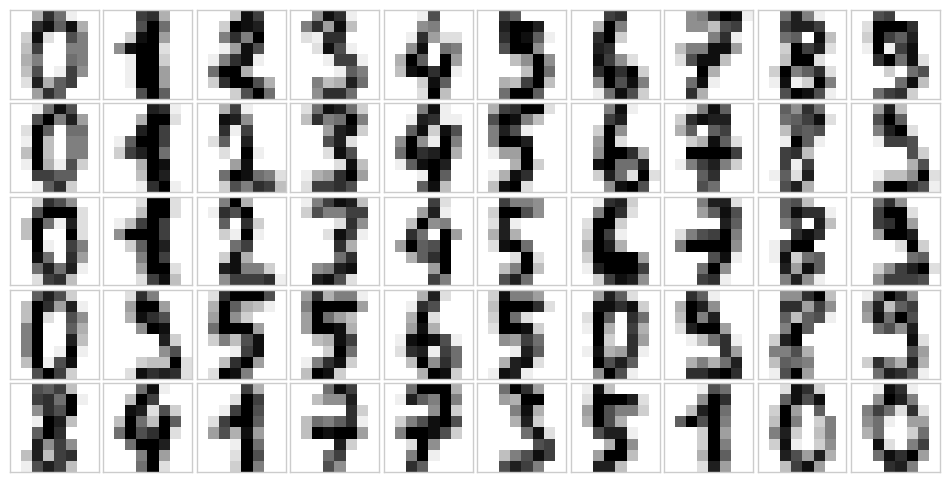

In [4]:
# Visualization of the first 50 digits from the Load Digits dataset
def plot_digits(data):
    fig, ax = plt.subplots(5,10, figsize=(12,6), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8,8), cmap='binary')
        im.set_clim(0,16)
plot_digits(digits.data) 

In [5]:
# For better GMM performance, I limit the number of dimensions.
# I use the PCA algorithm, retaining 99% of the data variance.
from sklearn.decomposition import PCA

pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

In [6]:
# I get 41 dimensions, which means their number has been reduced by 1/3 with almost zero data loss.

Text(0.5, 0, 'Number of components in the mixture')

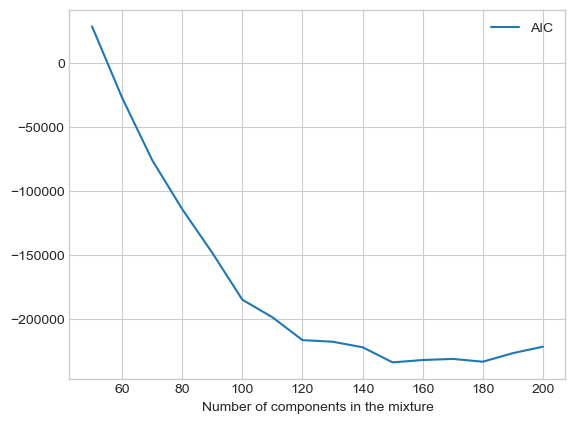

In [7]:
# I am now determining 'the best likelihood's quality' for the model in order to avoid overfitting.
# I am using the Akaike information criterion(AIC) and creating a visualization to determine how many components I should use for the GMM model.
from sklearn.mixture import GaussianMixture

n_components = np.arange(50, 210, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics, label='AIC')
plt.legend(loc='best')
plt.xlabel('Number of components in the mixture')

In [8]:
# The AIC value probably reaches its minimum for approximately 150 components(i.e., the number of Gaussian distributions).
gmm = GaussianMixture(150, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


In [9]:
# I use GMM as a generative model and sample 100 new points from the space reduced by the PCA algorithm - 41 dimensions.
data_new, labe_new = gmm.sample(100)
data_new.shape

(100, 41)

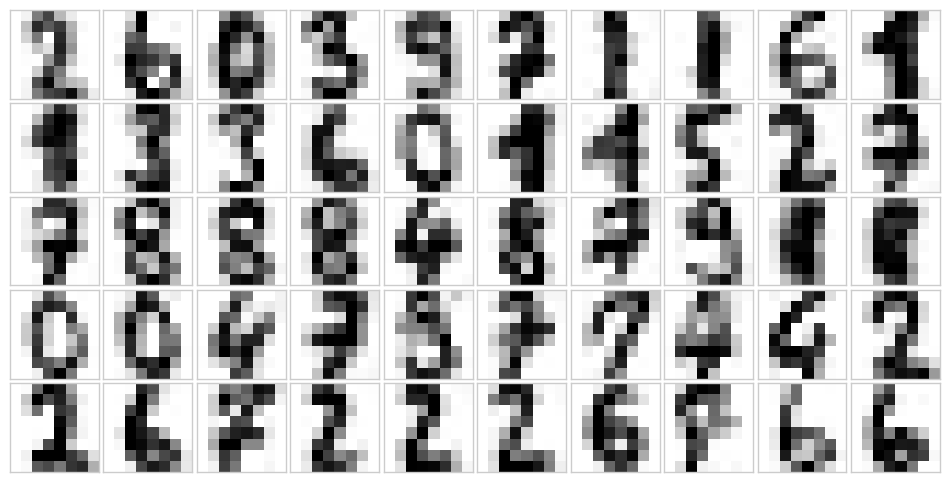

In [10]:
# I perform the inverse transformation to map completely newly generated data based on the Load Digits dataset.
digits_new = pca.inverse_transform(data_new)
# I visualize the generated new data.
plot_digits(digits_new)